# Validating Strawberry Puree via Infrared Spectral Analysis

<br>
<br>

The purpose of this analysis is to classify strawberry puree as "pure" or "not-pure" by analyzing the frequency domain in the mid-infrared spectrum using Attenuated Total Reflectance sampling.  Not-pure samples have been adulterated with other fruit purees.  

Spectral analysis is a common practice in analyzing fruit and vegetables.  Here, we use a back prop network with 5 hidden layers.

<br>
<br>

The Input Layer is made up of 235 nodes.  Each input node represents the strength of a specific wavenumber

Hidden Layers 1 and 5 have 1000 ReLU nodes

Hidden Layers 2,3 and 4 have 10000

The Output Layer is made up of 2 nodes representing unadulerated strawberry puree or the adulterated version.

<br>
<br>
<br>

The data used in this notebook came from an original analysis by Holland, Kemsley and Wilson.

<i>"Use of Fourier transform infrared spectroscopy and partial least squares regression for the detection of adulteration of strawberry purees" Holland JK, Kemsley EK, Wilson RH. (1998). Journal of the Science of Food and Agriculture, 76, 263-269</i>

Abstract and Full-text (paywall) are available here: https://europepmc.org/article/agr/ind21806286

The dataset was downloaded from: http://www.timeseriesclassification.com/description.php?Dataset=Strawberry

<br>
<br>
<br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

plt.style.use('dark_background')


In [2]:
df = pd.read_csv('MIR_Fruit_purees.csv')
df.head()

,Wavenumbers,NON-Strawberry,NON-Strawberry.1,NON-Strawberry.2,NON-Strawberry.3,NON-Strawberry.4,NON-Strawberry.5,NON-Strawberry.6,NON-Strawberry.7,NON-Strawberry.8,...,NON-Strawberry.622,NON-Strawberry.623,NON-Strawberry.624,NON-Strawberry.625,NON-Strawberry.626,NON-Strawberry.627,NON-Strawberry.628,NON-Strawberry.629,NON-Strawberry.630,NON-Strawberry.631
0,899.327,0.002806,0.002637,0.002416,0.002345,0.002303,0.002514,0.002105,0.002018,0.002154,...,0.002539,0.002569,0.002723,0.002542,0.002627,0.002631,0.002730,0.002713,0.002697,0.002789
1,903.187,0.002732,0.002638,0.002480,0.002292,0.002342,0.002488,0.002078,0.001999,0.002165,...,0.002507,0.002569,0.002714,0.002539,0.002629,0.002651,0.002839,0.002779,0.002905,0.003040
2,907.047,0.002661,0.002651,0.002511,0.002249,0.002350,0.002477,0.002077,0.001945,0.002191,...,0.002483,0.002541,0.002740,0.002574,0.002619,0.002696,0.002999,0.002877,0.003277,0.003359
3,910.907,0.002657,0.002757,0.002611,0.002303,0.002419,0.002542,0.002154,0.001964,0.002275,...,0.002563,0.002599,0.002861,0.002664,0.002714,0.002809,0.003259,0.003085,0.003711,0.003796
4,914.767,0.002699,0.003000,0.002802,0.002466,0.002561,0.002713,0.002311,0.002083,0.002470,...,0.002764,0.002806,0.003090,0.002829,0.002939,0.003022,0.003649,0.003419,0.004265,0.004394


<br>
<br>

# Data Wrangling

### Isolate Wavenumbers from the dataframe

In [3]:
# isolate the wavenumbers into a new variable
wavenumbers = df.iloc[:,0]

In [4]:
# remove "Wavenumbers" from the original df prior to Transposing
df.drop(labels='Wavenumbers', axis=1, inplace=True)

<br>

### Transpose the dataframe, and rename the output variable

In [5]:
# Transpose the df and reset index, then rename the old index
df = df.T
df = df.reset_index()
df = df.rename(columns={'index': 'Outcome'})

# shuffle the df so Outcome is at the end 
df = df.iloc[:,1:].join(df.iloc[:,0])

<br>

### Rename the Columns as Wavenumbers

In [6]:
# convert the wavenumbers to columns and round them down to 3 decimal places
cols = [ round(f, 3) for f in wavenumbers.to_list() ]

# add the final column name 'Outcome' to the list and set the df columns 
cols.append('Outcome')
df.columns = cols

# sort the df by Outcome and reset index
df = df.sort_values('Outcome').reset_index(drop=True)

df

,899.327,903.187,907.047,910.907,914.767,918.627,922.487,926.347,930.207,934.067,...,1771.684,1775.544,1779.404,1783.264,1787.124,1790.984,1794.844,1798.704,1802.564,Outcome
0,0.002806,0.002732,0.002661,0.002657,0.002699,0.002762,0.002749,0.002686,0.002637,0.002617,...,0.000348,0.000216,0.000166,0.000117,0.000087,0.000046,0.000011,0.000009,0.000009,NON-Strawberry
1,0.002637,0.002638,0.002651,0.002757,0.003000,0.003313,0.003412,0.003302,0.003162,0.003060,...,0.000013,0.000006,-0.000005,-0.000005,-0.000006,0.000002,0.000010,0.000005,0.000005,NON-Strawberry.1
2,0.002054,0.002039,0.002030,0.002076,0.002202,0.002350,0.002408,0.002352,0.002276,0.002273,...,0.000466,0.000294,0.000192,0.000125,0.000077,0.000054,0.000035,0.000014,0.000014,NON-Strawberry.10
3,0.002330,0.002332,0.002291,0.002328,0.002482,0.002639,0.002655,0.002555,0.002467,0.002428,...,0.000337,0.000219,0.000111,0.000071,0.000024,0.000052,0.000061,0.000018,0.000018,NON-Strawberry.100
4,0.002562,0.002565,0.002584,0.002691,0.002886,0.003113,0.003233,0.003239,0.003178,0.003077,...,0.000307,0.000199,0.000126,0.000082,0.000051,0.000041,0.000029,0.000009,0.000009,NON-Strawberry.101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,0.002123,0.002187,0.002206,0.002206,0.002351,0.002564,0.002668,0.002598,0.002560,0.002507,...,0.000254,0.000151,0.000096,0.000066,0.000043,0.000038,0.000037,0.000014,0.000014,Strawberry.95
979,0.002384,0.002392,0.002383,0.002491,0.002710,0.002888,0.002948,0.002914,0.002822,0.002701,...,0.000103,0.000054,0.000021,0.000012,0.000005,0.000015,0.000026,0.000013,0.000013,Strawberry.96
980,0.002449,0.002499,0.002506,0.002657,0.002912,0.003137,0.003310,0.003324,0.003217,0.003085,...,0.000103,0.000057,0.000035,0.000020,0.000016,0.000015,0.000009,0.000007,0.000007,Strawberry.97
981,0.002276,0.002358,0.002431,0.002593,0.002830,0.003089,0.003257,0.003285,0.003238,0.003143,...,0.000184,0.000102,0.000060,0.000032,0.000023,0.000019,0.000014,0.000013,0.000013,Strawberry.98


<br>
<br>

### Convert the Dependent Variable to True or False values

Binary classification problem

In [7]:
# replace NON Strawberry outcomes with False
df.loc[:, 'Outcome'] = df.loc[:,'Outcome'].replace(to_replace=r'^NON.*$', value=False, regex=True)

# replace Strawberry with True
df.loc[:, 'Outcome'] = df.loc[:,'Outcome'].replace(to_replace=r'^Straw.*$', value=True, regex=True)

In [8]:
df

,899.327,903.187,907.047,910.907,914.767,918.627,922.487,926.347,930.207,934.067,...,1771.684,1775.544,1779.404,1783.264,1787.124,1790.984,1794.844,1798.704,1802.564,Outcome
0,0.002806,0.002732,0.002661,0.002657,0.002699,0.002762,0.002749,0.002686,0.002637,0.002617,...,0.000348,0.000216,0.000166,0.000117,0.000087,0.000046,0.000011,0.000009,0.000009,False
1,0.002637,0.002638,0.002651,0.002757,0.003000,0.003313,0.003412,0.003302,0.003162,0.003060,...,0.000013,0.000006,-0.000005,-0.000005,-0.000006,0.000002,0.000010,0.000005,0.000005,False
2,0.002054,0.002039,0.002030,0.002076,0.002202,0.002350,0.002408,0.002352,0.002276,0.002273,...,0.000466,0.000294,0.000192,0.000125,0.000077,0.000054,0.000035,0.000014,0.000014,False
3,0.002330,0.002332,0.002291,0.002328,0.002482,0.002639,0.002655,0.002555,0.002467,0.002428,...,0.000337,0.000219,0.000111,0.000071,0.000024,0.000052,0.000061,0.000018,0.000018,False
4,0.002562,0.002565,0.002584,0.002691,0.002886,0.003113,0.003233,0.003239,0.003178,0.003077,...,0.000307,0.000199,0.000126,0.000082,0.000051,0.000041,0.000029,0.000009,0.000009,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,0.002123,0.002187,0.002206,0.002206,0.002351,0.002564,0.002668,0.002598,0.002560,0.002507,...,0.000254,0.000151,0.000096,0.000066,0.000043,0.000038,0.000037,0.000014,0.000014,True
979,0.002384,0.002392,0.002383,0.002491,0.002710,0.002888,0.002948,0.002914,0.002822,0.002701,...,0.000103,0.000054,0.000021,0.000012,0.000005,0.000015,0.000026,0.000013,0.000013,True
980,0.002449,0.002499,0.002506,0.002657,0.002912,0.003137,0.003310,0.003324,0.003217,0.003085,...,0.000103,0.000057,0.000035,0.000020,0.000016,0.000015,0.000009,0.000007,0.000007,True
981,0.002276,0.002358,0.002431,0.002593,0.002830,0.003089,0.003257,0.003285,0.003238,0.003143,...,0.000184,0.000102,0.000060,0.000032,0.000023,0.000019,0.000014,0.000013,0.000013,True


<br>
<br>
<br>

# EDA on the Spectra

### Plot wavenumbers for Strawberry == True

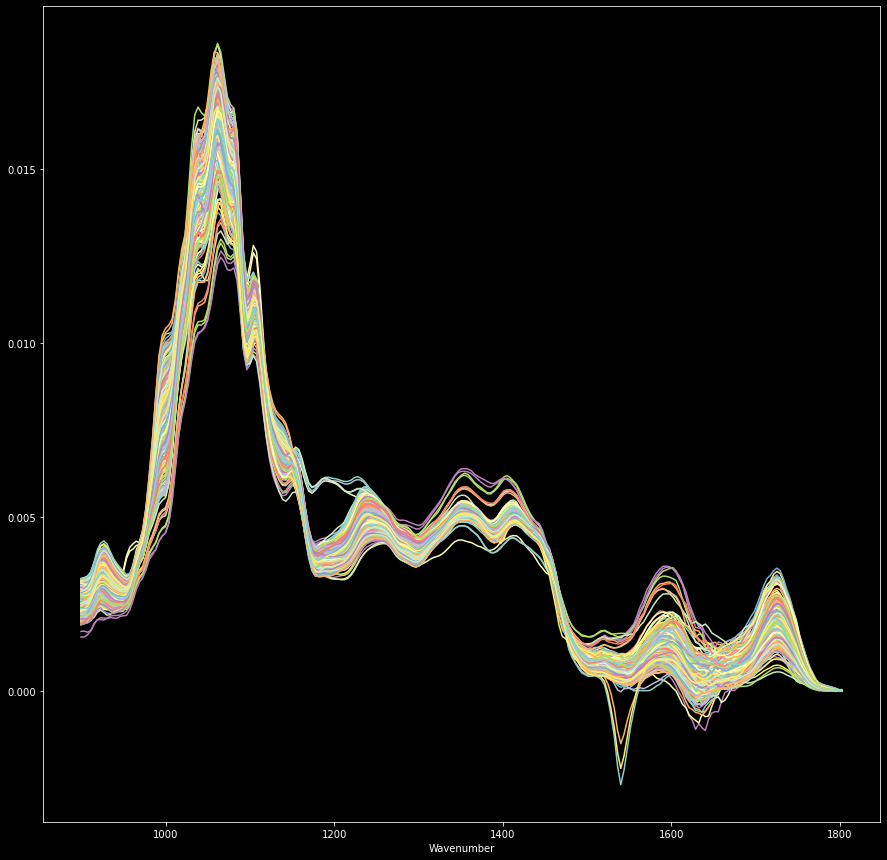

In [9]:
# plot wavenumber vs emission where Strawberry == True
plt.figure(figsize=(15,15))
plt.plot(df.query('Outcome == True').loc[:,df.columns != 'Outcome'].T)
plt.xlabel('Wavenumber');

<br>
<br>

### Plot wavenumbers for Strawberry == False

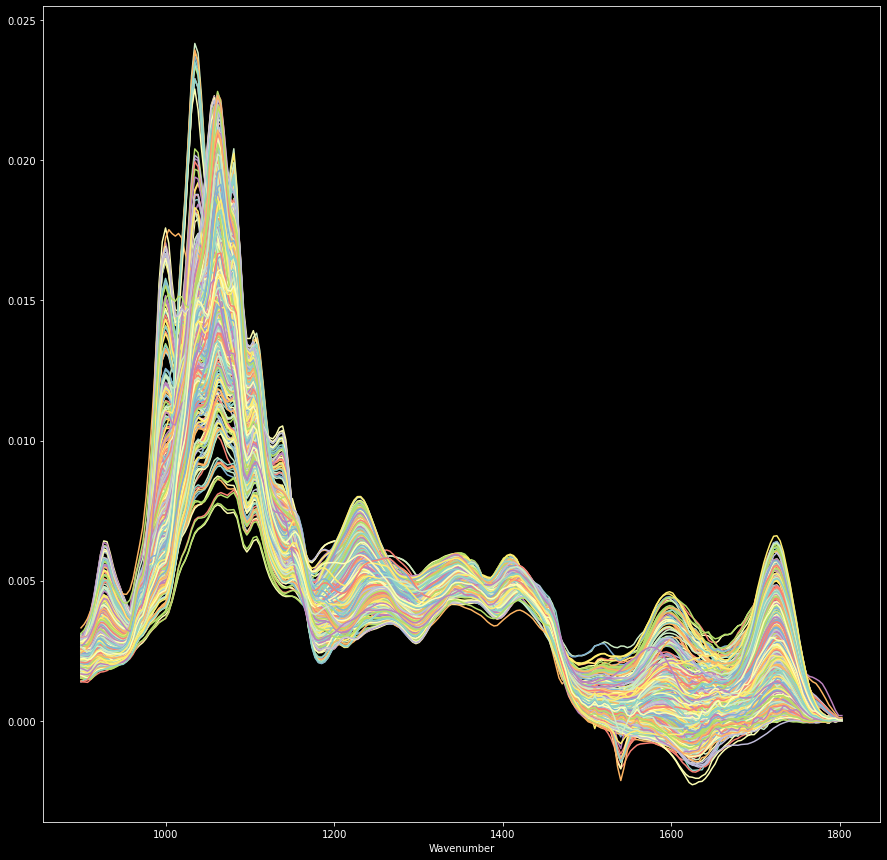

In [10]:
# plot the wavenumber vs emission where Strawberry == False
plt.figure(figsize=(15,15))
plt.plot(df.query('Outcome == False').loc[:,df.columns != 'Outcome'].T)
plt.xlabel('Wavenumber');

<br>
<br>

### Split the Data

In [11]:
# subset 30% of the dataframe to make up the validation set
dfv = df.sample(frac=0.3, replace=False, random_state=42)

# assign the rest as the training set
dft = df.drop(dfv.index)

In [12]:
dfv

,899.327,903.187,907.047,910.907,914.767,918.627,922.487,926.347,930.207,934.067,...,1771.684,1775.544,1779.404,1783.264,1787.124,1790.984,1794.844,1798.704,1802.564,Outcome
810,0.002427,0.002441,0.002418,0.002486,0.002692,0.002865,0.002895,0.002864,0.002800,0.002707,...,0.000246,0.000160,0.000076,0.000045,0.000018,0.000045,0.000055,2.105970e-05,2.105970e-05,True
801,0.002825,0.002842,0.002886,0.003053,0.003300,0.003552,0.003698,0.003710,0.003619,0.003465,...,0.000070,0.000046,0.000048,0.000033,0.000032,0.000006,-0.000007,5.991910e-07,5.991910e-07,True
813,0.002900,0.002901,0.002936,0.003026,0.003212,0.003426,0.003544,0.003518,0.003412,0.003269,...,0.000159,0.000084,0.000069,0.000052,0.000044,0.000032,0.000006,7.976260e-06,7.976260e-06,True
497,0.001673,0.001652,0.001653,0.001709,0.001844,0.001991,0.002043,0.002025,0.002004,0.001994,...,0.000553,0.000350,0.000233,0.000149,0.000092,0.000060,0.000035,1.509890e-05,1.509890e-05,False
67,0.002103,0.002150,0.002175,0.002315,0.002566,0.002818,0.003002,0.003080,0.003031,0.002924,...,0.000234,0.000140,0.000086,0.000051,0.000033,0.000018,0.000004,2.365600e-06,2.365600e-06,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,0.002742,0.002744,0.002791,0.002922,0.003131,0.003393,0.003562,0.003589,0.003499,0.003362,...,0.000212,0.000133,0.000094,0.000060,0.000039,0.000027,0.000014,7.387230e-06,7.387230e-06,True
558,0.002481,0.002442,0.002346,0.002383,0.002463,0.002524,0.002524,0.002373,0.002270,0.002202,...,0.000202,0.000127,0.000086,0.000057,0.000041,0.000028,0.000014,5.470350e-06,0.000000e+00,False
318,0.002535,0.002573,0.002700,0.002994,0.003356,0.003763,0.004073,0.004146,0.004066,0.003882,...,0.000098,0.000054,0.000038,0.000022,0.000011,0.000005,0.000004,6.373390e-06,6.373390e-06,False
568,0.002840,0.002945,0.003123,0.003365,0.003707,0.004164,0.004570,0.004789,0.004740,0.004470,...,0.000120,0.000077,0.000058,0.000040,0.000031,0.000016,0.000006,3.349130e-06,3.349130e-06,False


In [13]:
dft

,899.327,903.187,907.047,910.907,914.767,918.627,922.487,926.347,930.207,934.067,...,1771.684,1775.544,1779.404,1783.264,1787.124,1790.984,1794.844,1798.704,1802.564,Outcome
0,0.002806,0.002732,0.002661,0.002657,0.002699,0.002762,0.002749,0.002686,0.002637,0.002617,...,0.000348,0.000216,0.000166,0.000117,0.000087,0.000046,0.000011,0.000009,0.000009,False
1,0.002637,0.002638,0.002651,0.002757,0.003000,0.003313,0.003412,0.003302,0.003162,0.003060,...,0.000013,0.000006,-0.000005,-0.000005,-0.000006,0.000002,0.000010,0.000005,0.000005,False
3,0.002330,0.002332,0.002291,0.002328,0.002482,0.002639,0.002655,0.002555,0.002467,0.002428,...,0.000337,0.000219,0.000111,0.000071,0.000024,0.000052,0.000061,0.000018,0.000018,False
4,0.002562,0.002565,0.002584,0.002691,0.002886,0.003113,0.003233,0.003239,0.003178,0.003077,...,0.000307,0.000199,0.000126,0.000082,0.000051,0.000041,0.000029,0.000009,0.000009,False
6,0.002427,0.002377,0.002372,0.002499,0.002664,0.002836,0.002936,0.002920,0.002849,0.002783,...,0.000382,0.000249,0.000145,0.000095,0.000048,0.000049,0.000045,0.000015,0.000015,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,0.002320,0.002355,0.002370,0.002485,0.002716,0.002936,0.003050,0.003047,0.002968,0.002893,...,0.000176,0.000100,0.000058,0.000035,0.000027,0.000027,0.000023,0.000011,0.000011,True
973,0.002351,0.002327,0.002315,0.002446,0.002690,0.002908,0.002998,0.002972,0.002895,0.002813,...,0.000159,0.000093,0.000054,0.000034,0.000016,0.000015,0.000017,0.000008,0.000008,True
975,0.001889,0.001994,0.002050,0.002108,0.002263,0.002475,0.002599,0.002573,0.002488,0.002423,...,0.000244,0.000145,0.000087,0.000059,0.000035,0.000022,0.000021,0.000010,0.000010,True
979,0.002384,0.002392,0.002383,0.002491,0.002710,0.002888,0.002948,0.002914,0.002822,0.002701,...,0.000103,0.000054,0.000021,0.000012,0.000005,0.000015,0.000026,0.000013,0.000013,True


<br>
<br>

## ~Normalize the data~

In [14]:
# Find the maximum value of all the independent variables in the Training Set
maxval = dft.iloc[:, :-1].max().max()  # max of each column , then max of all columns
maxval

0.023935799

In [15]:
# Normalize the training set against the maxval and add the output variable back in
dft_norm = dft.iloc[:, :-1] / maxval
dft_norm = dft_norm.join(dft.iloc[:, -1])

dft_norm

,899.327,903.187,907.047,910.907,914.767,918.627,922.487,926.347,930.207,934.067,...,1771.684,1775.544,1779.404,1783.264,1787.124,1790.984,1794.844,1798.704,1802.564,Outcome
0,0.117210,0.114136,0.111179,0.111008,0.112747,0.115389,0.114838,0.112209,0.110165,0.109318,...,0.014523,0.009021,0.006940,0.004871,0.003636,0.001915,0.000452,0.000393,0.000393,False
1,0.110186,0.110226,0.110771,0.115199,0.125337,0.138418,0.142568,0.137945,0.132102,0.127824,...,0.000547,0.000248,-0.000207,-0.000229,-0.000230,0.000077,0.000404,0.000212,0.000212,False
3,0.097344,0.097430,0.095698,0.097260,0.103684,0.110273,0.110903,0.106730,0.103078,0.101439,...,0.014086,0.009134,0.004627,0.002966,0.001023,0.002164,0.002563,0.000765,0.000765,False
4,0.107022,0.107173,0.107953,0.112409,0.120585,0.130043,0.135076,0.135320,0.132791,0.128559,...,0.012809,0.008308,0.005247,0.003417,0.002133,0.001698,0.001229,0.000392,0.000392,False
6,0.101399,0.099287,0.099082,0.104399,0.111311,0.118482,0.122666,0.122005,0.119012,0.116281,...,0.015967,0.010419,0.006053,0.003958,0.001988,0.002038,0.001877,0.000617,0.000617,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,0.096907,0.098393,0.099032,0.103806,0.113479,0.122669,0.127405,0.127315,0.124015,0.120881,...,0.007344,0.004169,0.002418,0.001472,0.001146,0.001116,0.000948,0.000477,0.000477,True
973,0.098216,0.097229,0.096706,0.102185,0.112387,0.121492,0.125252,0.124166,0.120934,0.117521,...,0.006654,0.003876,0.002239,0.001424,0.000678,0.000619,0.000715,0.000354,0.000354,True
975,0.078919,0.083314,0.085632,0.088089,0.094537,0.103421,0.108582,0.107512,0.103937,0.101226,...,0.010192,0.006038,0.003621,0.002453,0.001462,0.000935,0.000887,0.000427,0.000427,True
979,0.099599,0.099954,0.099568,0.104060,0.113228,0.120658,0.123147,0.121734,0.117909,0.112855,...,0.004321,0.002248,0.000859,0.000499,0.000225,0.000612,0.001088,0.000540,0.000540,True


In [16]:
# Normalize the validation set against the maxval and add the output variable back in
# We use the same maxval of the training set to avoid peeking into the future
dfv_norm = dfv.iloc[:, :-1] / maxval
dfv_norm = dfv_norm.join(dfv.iloc[:, -1])

dfv_norm

,899.327,903.187,907.047,910.907,914.767,918.627,922.487,926.347,930.207,934.067,...,1771.684,1775.544,1779.404,1783.264,1787.124,1790.984,1794.844,1798.704,1802.564,Outcome
810,0.101400,0.101975,0.101030,0.103853,0.112466,0.119683,0.120933,0.119650,0.116971,0.113105,...,0.010272,0.006676,0.003190,0.001889,0.000751,0.001890,0.002279,0.000880,0.000880,True
801,0.118040,0.118720,0.120553,0.127570,0.137848,0.148376,0.154515,0.154991,0.151201,0.144763,...,0.002919,0.001938,0.002004,0.001398,0.001324,0.000256,-0.000313,0.000025,0.000025,True
813,0.121162,0.121185,0.122655,0.126413,0.134201,0.143131,0.148068,0.146987,0.142563,0.136566,...,0.006655,0.003497,0.002870,0.002155,0.001821,0.001340,0.000261,0.000333,0.000333,True
497,0.069904,0.069024,0.069075,0.071400,0.077040,0.083185,0.085371,0.084591,0.083723,0.083291,...,0.023119,0.014605,0.009720,0.006219,0.003825,0.002519,0.001476,0.000631,0.000631,False
67,0.087862,0.089808,0.090859,0.096702,0.107208,0.117711,0.125425,0.128676,0.126619,0.122153,...,0.009758,0.005868,0.003585,0.002120,0.001395,0.000739,0.000159,0.000099,0.000099,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,0.114567,0.114636,0.116614,0.122059,0.130805,0.141741,0.148828,0.149949,0.146164,0.140443,...,0.008843,0.005540,0.003936,0.002502,0.001640,0.001107,0.000584,0.000309,0.000309,True
558,0.103647,0.102004,0.098023,0.099561,0.102884,0.105465,0.105465,0.099122,0.094816,0.091993,...,0.008445,0.005286,0.003581,0.002393,0.001713,0.001158,0.000597,0.000229,0.000000,False
318,0.105914,0.107509,0.112816,0.125096,0.140211,0.157231,0.170160,0.173230,0.169851,0.162182,...,0.004078,0.002249,0.001586,0.000935,0.000447,0.000197,0.000156,0.000266,0.000266,False
568,0.118664,0.123045,0.130482,0.140583,0.154858,0.173970,0.190937,0.200086,0.198027,0.186762,...,0.005013,0.003229,0.002431,0.001663,0.001277,0.000672,0.000236,0.000140,0.000140,False


<br>
<br>

### Plot the Normalized Data

#### Plot the Training Set where Strawberry == True

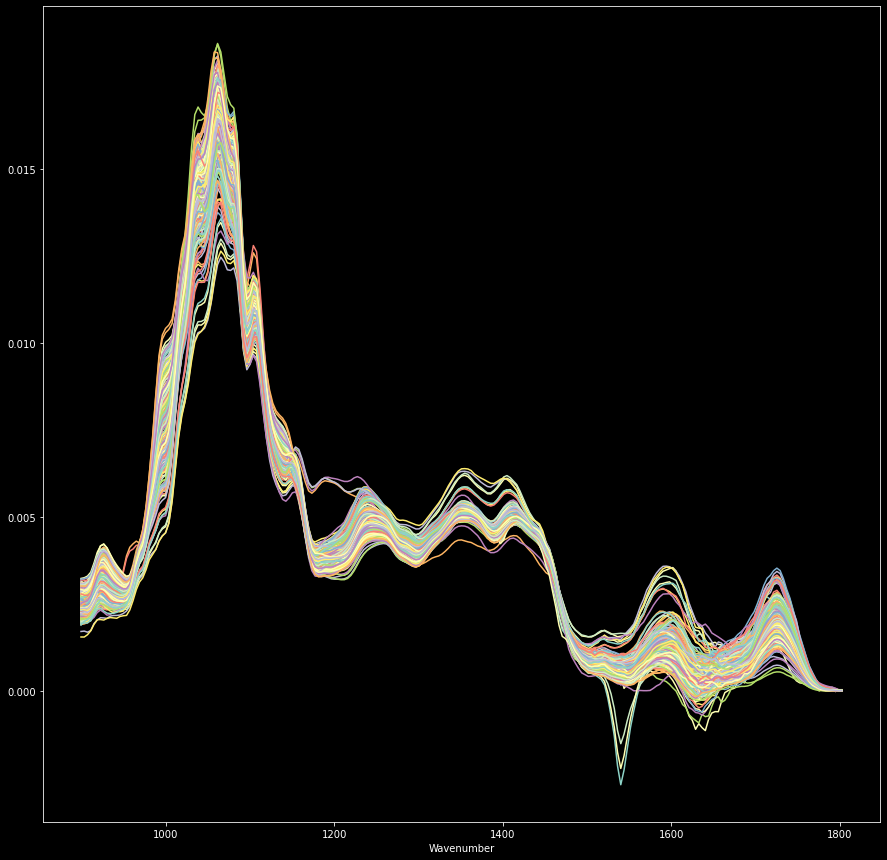

In [17]:
# plot wavenumber vs emission where Strawberry == True
plt.figure(figsize=(15,15))
plt.plot(dft.query('Outcome == True').loc[:,dft.columns != 'Outcome'].T)
plt.xlabel('Wavenumber');

<br>

#### Plot the Training Set where Strawberry == False

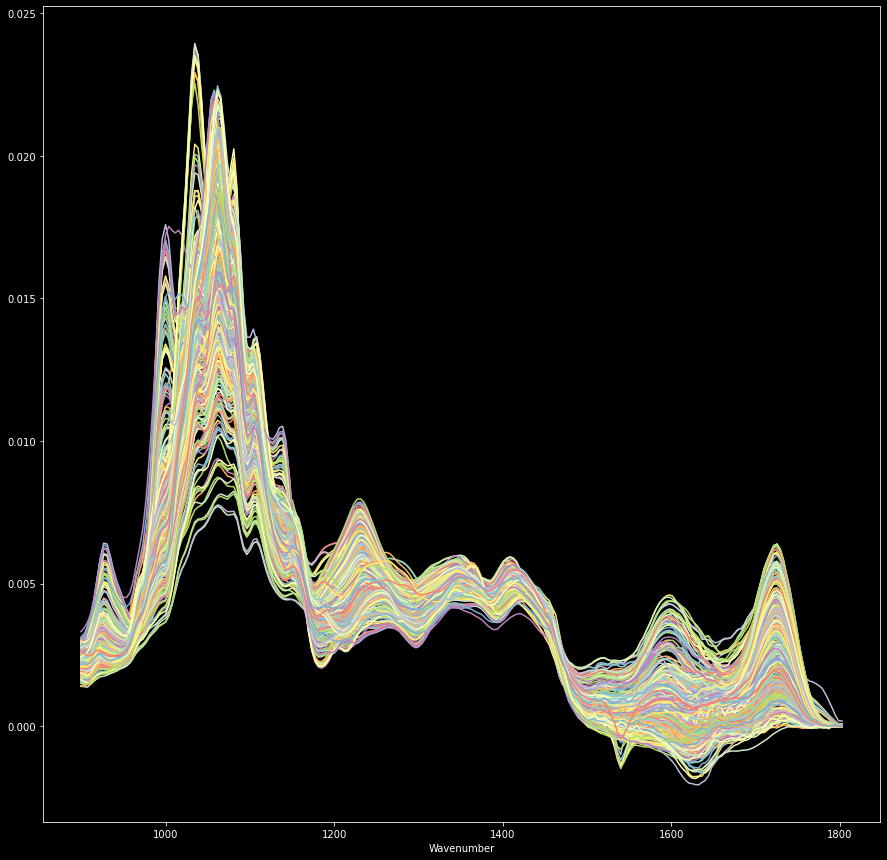

In [18]:
# plot the wavenumber vs emission where Strawberry == False
plt.figure(figsize=(15,15))
plt.plot(dft.query('Outcome == False').loc[:,dft.columns != 'Outcome'].T)
plt.xlabel('Wavenumber');

<br>

#### Plot the Validation Set where Strawberry == True

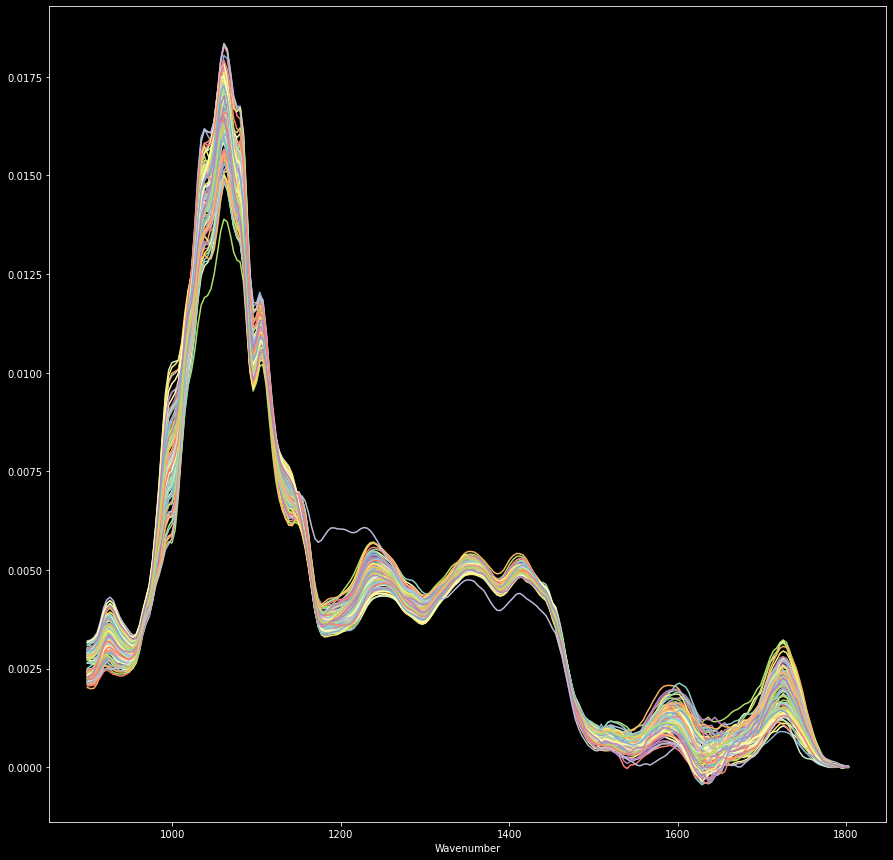

In [19]:
# plot wavenumber vs emission where Strawberry == True
plt.figure(figsize=(15,15))
plt.plot(dfv.query('Outcome == True').loc[:,dfv.columns != 'Outcome'].T)
plt.xlabel('Wavenumber');

<br>

#### Plot the Validation Set where Strawberry == False

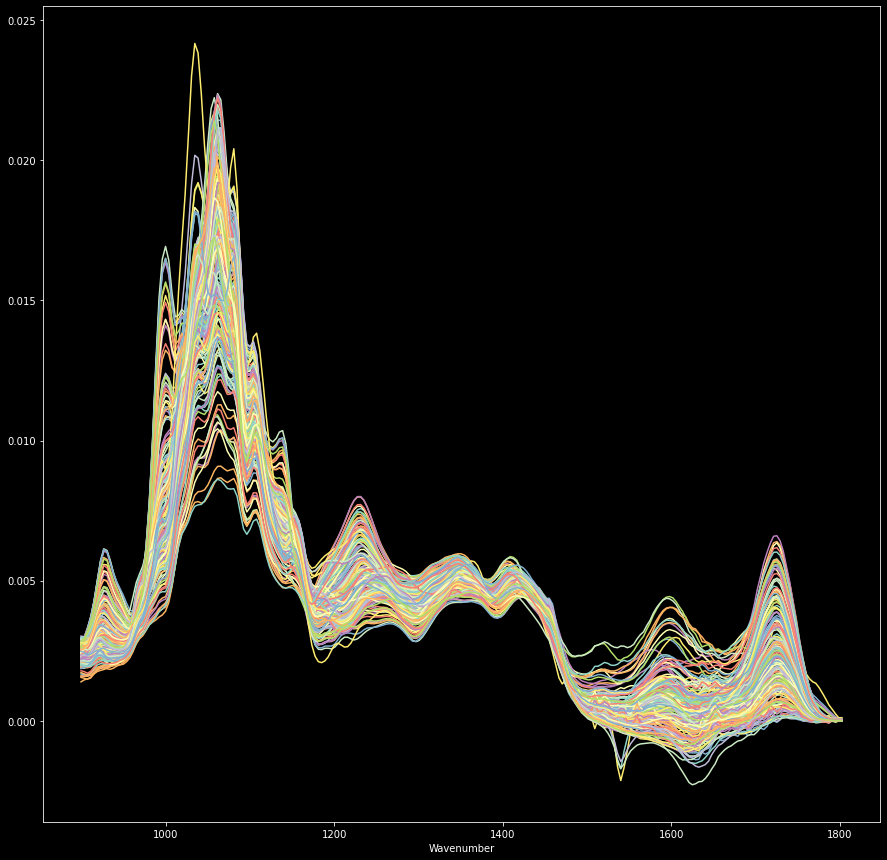

In [20]:
# plot the wavenumber vs emission where Strawberry == False
plt.figure(figsize=(15,15))
plt.plot(dfv.query('Outcome == False').loc[:,dfv.columns != 'Outcome'].T)
plt.xlabel('Wavenumber');

<br>
<br>
<br>
<br>

# Analysis

### Define the Learner

In [21]:
from fastai.tabular.all import *

dls = TabularDataLoaders.from_df(dft, y_names=['Outcome'], procs = [Categorify, FillMissing, Normalize])
learn = tabular_learner(dls, metrics=[accuracy, error_rate], lr=1e-3, layers=[1000,10000,10000,10000,1000])
# learn = tabular_learner(dls, metrics=accuracy, layers=[500,500,500,500])

<br>
<br>

### ~Define an Early Callback~

In [22]:
# early_stop = EarlyStoppingCallback(monitor='error_rate', min_delta=0.1, patience=2)

<br>
<br>

## Fit the model

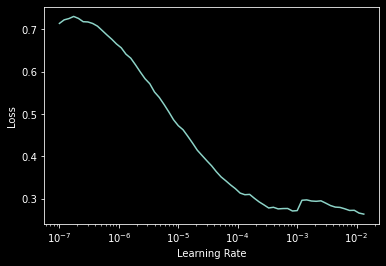

In [23]:
# plot the learning rates vs loss
lr_min,lr_steep = learn.lr_find()

In [24]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.32e-03, steepest point: 3.31e-06


In [25]:
learn.fit_one_cycle(80)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.318880,0.610111,0.868613,0.131387,00:00
1,0.223684,0.322826,0.912409,0.087591,00:00
2,0.179366,0.134394,0.963504,0.036496,00:00
3,0.153765,0.147618,0.948905,0.051095,00:00
4,0.133724,0.156388,0.941606,0.058394,00:00
5,0.118043,0.124098,0.963504,0.036496,00:00
6,0.102106,0.236961,0.956204,0.043796,00:00
7,0.091220,0.061039,0.978102,0.021898,00:00
8,0.116555,2.086047,0.773723,0.226277,00:00
9,0.141247,0.167169,0.956204,0.043796,00:00


<br>
<br>
<br>

# Show Predictions

<br>

### Make a Random Prediction on an Item in the Validation Set

In [26]:
rown = 3
row = dfv.iloc[rown, :-1]

print(f'Actually a Strawberry:           {dfv.iloc[rown, -1]}')
print(f'Predicted to be a Strawberry:    { bool(learn.predict(row=row)[1]) }')
# print(f'Predicted to be a Strawberry:    { bool(learn.predict(row=row)[-1][1].item()) }')

Actually a Strawberry:           False


Predicted to be a Strawberry:    False


<br>
<br>
<br>

## Iteratively Predict Over the Entire Validation Set

In [27]:
TP = 0
TN = 0
FP = 0
FN = 0

for i in range(len(dfv)):
    actual = dfv.iloc[i, -1]
    predicted = bool(learn.predict(row=dfv.iloc[i, :-1])[1].item())
    print(f'{str(i).rjust(4)}    {str(actual).ljust(6)}   {predicted}')
    
    if (predicted == True):
        if (actual == True): TP += 1
        else: FP += 1
            
    if (predicted == False):
        if (actual == False): TN += 1
        else: FN += 1
        
print("\n")
print(f'TP={TP}')
print(f'TN={TN}')
print(f'FP={FP}')
print(f'FN={FN}');

   0    True     True


   1    True     True


   2    True     True


   3    False    False


   4    False    False


   5    True     True


   6    True     True


   7    False    False


   8    False    False


   9    False    False


  10    False    False


  11    False    False


  12    True     True


  13    False    False


  14    False    False


  15    False    False


  16    False    False


  17    False    False


  18    False    False


  19    False    False


  20    False    False


  21    False    False


  22    True     True


  23    False    False


  24    False    False


  25    True     True


  26    False    False


  27    False    False


  28    False    False


  29    True     True


  30    False    False


  31    False    False


  32    False    False


  33    False    False


  34    False    False


  35    False    False


  36    False    False


  37    True     True


  38    False    False


  39    False    False


  40    True     True


  41    False    False


  42    False    False


  43    False    False


  44    True     True


  45    True     True


  46    True     True


  47    False    False


  48    True     True


  49    False    False


  50    False    False


  51    False    False


  52    True     True


  53    False    False


  54    False    False


  55    False    False


  56    False    False


  57    True     True


  58    False    False


  59    False    False


  60    True     True


  61    False    False


  62    True     True


  63    False    False


  64    False    True


  65    False    False


  66    False    False


  67    True     True


  68    True     True


  69    False    False


  70    True     True


  71    True     True


  72    False    False


  73    False    False


  74    False    False


  75    True     True


  76    False    False


  77    True     True


  78    True     True


  79    True     True


  80    False    False


  81    False    False


  82    False    False


  83    True     True


  84    True     True


  85    False    False


  86    True     True


  87    True     False


  88    True     True


  89    True     True


  90    False    False


  91    False    False


  92    True     True


  93    False    False


  94    True     True


  95    True     True


  96    False    False


  97    False    False


  98    True     True


  99    False    False


 100    False    False


 101    False    False


 102    False    True


 103    False    False


 104    False    False


 105    True     True


 106    True     True


 107    True     True


 108    True     True


 109    False    False


 110    False    False


 111    False    False


 112    False    False


 113    True     True


 114    False    False


 115    False    False


 116    False    False


 117    False    False


 118    True     True


 119    False    False


 120    False    False


 121    False    False


 122    True     True


 123    False    False


 124    False    False


 125    False    False


 126    False    False


 127    False    False


 128    True     True


 129    True     True


 130    False    False


 131    True     True


 132    False    False


 133    True     True


 134    True     True


 135    False    False


 136    False    False


 137    False    False


 138    False    False


 139    True     True


 140    True     True


 141    False    False


 142    False    False


 143    False    False


 144    False    False


 145    True     True


 146    False    False


 147    False    False


 148    False    False


 149    False    False


 150    True     True


 151    True     True


 152    True     True


 153    False    False


 154    False    False


 155    True     True


 156    False    False


 157    False    False


 158    False    False


 159    False    False


 160    False    False


 161    False    False


 162    False    False


 163    False    False


 164    True     True


 165    False    False


 166    False    False


 167    False    False


 168    False    False


 169    False    False


 170    False    False


 171    False    False


 172    False    False


 173    False    False


 174    False    False


 175    True     True


 176    True     True


 177    True     True


 178    False    False


 179    True     True


 180    True     True


 181    False    False


 182    False    False


 183    False    False


 184    False    False


 185    False    False


 186    False    False


 187    True     True


 188    True     True


 189    False    False


 190    True     True


 191    True     True


 192    True     True


 193    False    False


 194    False    False


 195    True     True


 196    False    False


 197    False    False


 198    False    False


 199    True     True


 200    False    False


 201    False    False


 202    True     True


 203    True     True


 204    False    False


 205    False    False


 206    False    False


 207    True     True


 208    False    False


 209    True     True


 210    False    False


 211    True     True


 212    True     True


 213    False    False


 214    False    False


 215    False    False


 216    False    False


 217    False    False


 218    False    False


 219    True     True


 220    False    False


 221    True     True


 222    False    False


 223    True     True


 224    False    False


 225    True     True


 226    False    False


 227    False    False


 228    False    False


 229    False    False


 230    True     True


 231    True     True


 232    False    False


 233    True     True


 234    False    False


 235    False    False


 236    False    False


 237    True     True


 238    True     True


 239    False    False


 240    False    False


 241    False    False


 242    False    False


 243    False    False


 244    True     True


 245    True     True


 246    False    False


 247    False    False


 248    True     True


 249    False    False


 250    False    False


 251    False    False


 252    True     True


 253    False    False


 254    False    False


 255    False    False


 256    False    False


 257    False    False


 258    False    False


 259    False    False


 260    False    False


 261    True     True


 262    False    False


 263    False    False


 264    False    False


 265    False    False


 266    False    False


 267    True     True


 268    False    False


 269    False    False


 270    False    False


 271    True     True


 272    False    False


 273    False    False


 274    False    False


 275    True     True


 276    False    False


 277    True     True


 278    False    False


 279    True     True


 280    False    False


 281    False    False


 282    True     True


 283    False    False


 284    False    False


 285    False    False


 286    False    False


 287    True     True


 288    False    False


 289    False    False


 290    True     True


 291    False    False


 292    False    False


 293    False    False


 294    True     True


TP=97
TN=195
FP=2
FN=1


<br>
<br>
<br>

# Score the Predictions

In [28]:
accuracy = (TP + TN) / len(dfv)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = (2 * precision * recall) / (precision + recall)

print('\n')
print(f'Accuracy:  {accuracy}')
print(f'Precision: {precision}')
print(f'Recall:    {recall}')
print(f'F1 Score:  {F1}')



Accuracy:  0.9898305084745763
Precision: 0.9797979797979798
Recall:    0.9897959183673469
F1 Score:  0.9847715736040609
